<a href="https://colab.research.google.com/github/Jadeilson08/tcc-data-science/blob/master/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapas:

## 1. coleta de dados
- [x] Obtenha os dados de preço histórico de Bitcoin e Ethereum em um formato de tabela (por exemplo, CSV).
- [x] Obtenha os dados do valor do dolar por dia

## 2. tratar dados
- [x] Utilize a biblioteca Pandas para carregar e manipular os dados.

## 3. visualizar/analisar e explorar dados
- [x] Utilize a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
- [x] Unir DF's
- [ ] Utilize a biblioteca de aprendizado de máquina scikit-learn para dividir os dados em conjuntos de treinamento e teste.
- [ ] Escolha um modelo de aprendizado de máquina apropriado para séries temporais (por exemplo, ARIMA, SARIMA, Prophet) e treine-o com os dados de treinamento.
- [ ] Faça previsões com o modelo treinado utilizando os dados de teste e avaliar a precisão do modelo.
- [ ] Utilize o modelo treinado para fazer previsões futuras.

In [1]:
# importando o data_reader
!pip install -q yfinance
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


yfin.pdr_override()

In [2]:
# criptomoedas analisadas: Bitcoin(BTC-USD), Ethereum(ETH-USD), Tether(USDT-USD), BNB(BNB)

#data inicial e final
start_date = '2019-08-01'
end_date = '2021-07-30'

# coletando os dataframe
df_bitcoin = pdr.get_data_yahoo('BTC-USD', start=start_date, end=end_date)
df_ethereum = pdr.get_data_yahoo('ETH-USD', start=start_date, end=end_date)
df_tether = pdr.get_data_yahoo('USDT-USD', start=start_date, end=end_date)
df_bnb = pdr.get_data_yahoo('BNB', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# o index de todos os dataframe ja sao as datas, sem necessidade de atualizar o indice
df_bitcoin.info()
#df_ethereum.info()
#df_tether.info()
#df_bnb.info()
''' etapa 1 realizada '''

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 2019-08-01 to 2021-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       729 non-null    float64
 1   High       729 non-null    float64
 2   Low        729 non-null    float64
 3   Close      729 non-null    float64
 4   Adj Close  729 non-null    float64
 5   Volume     729 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 39.9 KB


' etapa 1 realizada '

In [4]:
#verificando se tem algum valor nan ou null
df_bitcoin.head()
df_bitcoin.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [5]:
''' 
  etapa 2
  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv
  no seguinte endereco
  https://br.investing.com/currencies/usd-brl-historical-data

'''

' \n  etapa 2\n  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv\n  no seguinte endereco\n  https://br.investing.com/currencies/usd-brl-historical-data\n\n'

In [6]:
df_dolar = pd.read_csv('https://raw.githubusercontent.com/Jadeilson08/tcc-data-science/master/USD_BRL_20190801_20210730.csv')

#precisa mudar o index para a colula Data
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      522 non-null    object
 1   Último    522 non-null    object
 2   Abertura  522 non-null    object
 3   Máxima    522 non-null    object
 4   Mínima    522 non-null    object
 5   Vol.      505 non-null    object
 6   Var%      522 non-null    object
dtypes: object(7)
memory usage: 28.7+ KB


In [7]:
from numpy import float64

#renomeando colunas para ingles
df_dolar = df_dolar.rename(columns={'Último': 'dolar_close', 'Abertura': 'dolar_open', 'Máxima': 'dolar_high', 'Mínima': 'dolar_low', 'Vol.' : 'dolar_volume', 'Var%': 'dolar_variation'})

#convertando BR para US
columns = ['dolar_close', 'dolar_open', 'dolar_high', 'dolar_low']

for column in columns:
  df_dolar[column] = df_dolar[column].apply(lambda x: x.replace(',', '.')).astype(float64)

df_dolar['Data'] = pd.to_datetime(df_dolar['Data'], format='%d.%m.%Y')

#alterando o index para Data
df_dolar = df_dolar.set_index('Data')

df_dolar.sort_values('Data')

,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation
Data,,,,,,
2019-08-01,3.8403,3.8165,3.8618,3.8115,"77,21K","0,72%"
2019-08-02,3.8893,3.8411,3.8937,3.8397,"68,81K","1,28%"
2019-08-05,3.9783,3.8859,3.9786,3.8859,"75,39K","2,29%"
2019-08-06,3.9612,3.9758,3.9866,3.9356,"71,00K","-0,43%"
2019-08-07,3.9691,3.9619,3.9931,3.9448,"75,52K","0,20%"
...,...,...,...,...,...,...
2021-07-26,5.1761,5.2051,5.2304,5.1516,"68,85K","-0,47%"
2021-07-27,5.1690,5.1769,5.2061,5.1486,"92,09K","-0,14%"
2021-07-28,5.1157,5.1710,5.1926,5.1040,"112,11K","-1,03%"


In [8]:
# visualizando dados vazios 
print(df_dolar.isna().any())
print(df_dolar.isna().sum())
df_dolar['dolar_volume'].head()

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume        True
dolar_variation    False
dtype: bool
dolar_close         0
dolar_open          0
dolar_high          0
dolar_low           0
dolar_volume       17
dolar_variation     0
dtype: int64


Data
2021-07-30     89,74K
2021-07-29     92,46K
2021-07-28    112,11K
2021-07-27     92,09K
2021-07-26     68,85K
Name: dolar_volume, dtype: object

In [9]:
#funcao para remover k 
def remove_k(numero_k):
  return float(numero_k.replace(',', '.').replace('K', '').replace('k',''))

#funcao para add k
def add_k(numero):
  return f"{str(numero).replace('.', ',')}K"

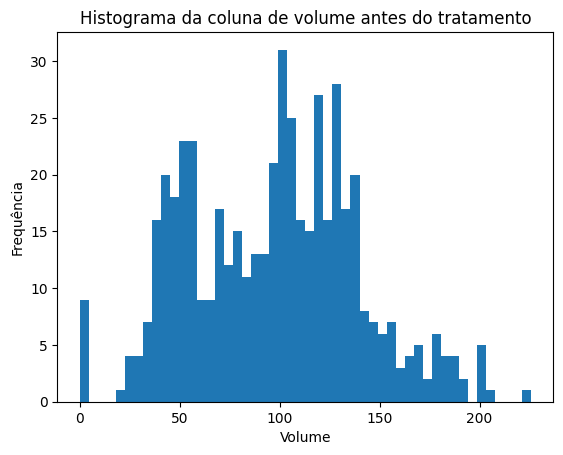

In [10]:
#plotando hist para analise de dados
dolar_volume = df_dolar['dolar_volume'].dropna().apply(remove_k)
plt.hist(dolar_volume, bins=50)
plt.title('Histograma da coluna de volume antes do tratamento')
plt.xlabel('Volume')
plt.ylabel('Frequência')
plt.show()

In [11]:
dolar_volume = dolar_volume.sort_values()

# Imprimindo as medidas estatísticas
print(dolar_volume.describe())

count    505.000000
mean      96.975327
std       42.635833
min        0.000000
25%       60.090000
50%      100.200000
75%      126.860000
max      225.650000
Name: dolar_volume, dtype: float64


In [12]:
# como ha valores muitos extremos (225.65~0) e a media e mediana sao valores proximos
# sera adotado a mediana como valor para efetuar preencher as linhas faltantes
# da coluna df_dolar['dolar_volume']

median_k = add_k(dolar_volume.median())

df_dolar['dolar_volume'].fillna(median_k, inplace=True)

print(df_dolar.isna().any())

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume       False
dolar_variation    False
dtype: bool


In [13]:
'''fim etapa 2 e 3 '''

'fim etapa 2 e 3 '

In [14]:
'''
  etapa 4:

  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
'''

'\n  etapa 4:\n\n  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.\n'

<Axes: title={'center': 'Bitcoin DataSet'}, xlabel='Date'>

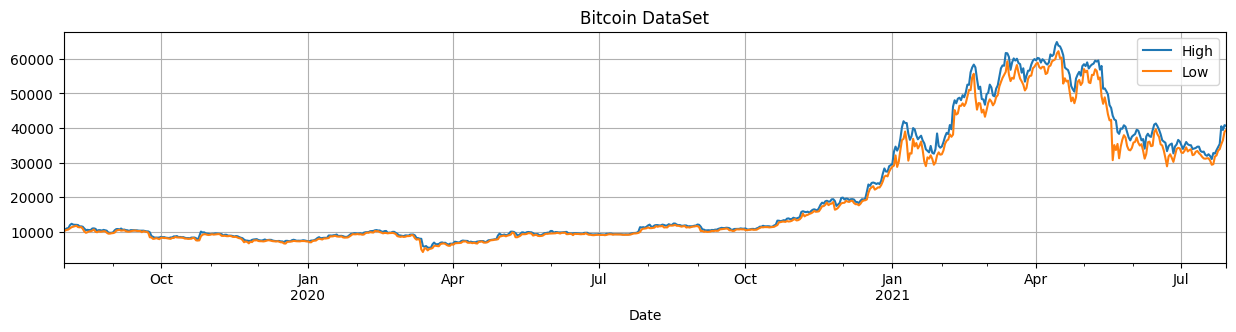

In [15]:
#plotando bitcoin
df_bitcoin[['High', 'Low']].plot(figsize=(15, 3), title='Bitcoin DataSet', grid=True)

<Axes: title={'center': 'Dolar DataSet'}, xlabel='Data'>

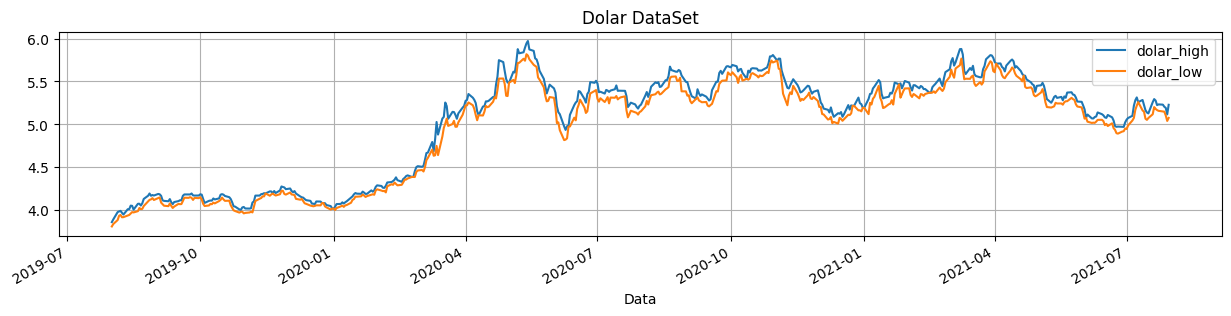

In [16]:
#plotando dolar

df_dolar[['dolar_high', 'dolar_low']].plot(figsize=(15, 3), title='Dolar DataSet', grid=True)

In [17]:
''' fim etapa 4 '''

' fim etapa 4 '

In [18]:
'''
  etapa 5
  unir DF's
'''

df_bitcoin_dolar = df_bitcoin.join(df_dolar)